In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folders = os.listdir("Data")

In [3]:
def removeUnamed(df):
    columnList = df.columns.tolist()
    newColumnList = columnList.copy()
    i = 0
    while i<len(newColumnList):
        if "Unnamed" in newColumnList[i]:
            stats = newColumnList[i-1].split(" / ")
            newColumnList[i-1] = stats[0]
            newColumnList[i] = " ".join(stats)
            newColumnList[i+1] = " ".join(stats) + " percentage"
            
        if "Losses" in newColumnList[i] or "Recoveries" in newColumnList[i]:
            stats = newColumnList[i].split(" / ")
            newColumnList[i] = stats[0]
            newColumnList[i+1] = stats[0] + " "+stats[1]
            newColumnList[i+2] = stats[0] + " "+stats[2]
            newColumnList[i+3] = stats[0] + " "+stats[3]
            i+=3
        i+=1
    columnsRenamed = dict(zip(columnList,newColumnList))
    df = df.rename(columns=columnsRenamed)
    return df

In [4]:
def removePercents(df):
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if "percent" in columns[i]:
            df.drop(columns[i],axis=1,inplace=True)
    return df

In [5]:
teams = dict(zip(folders, [[]]*len(folders)))
for folder in folders[:-1]:
    for season in os.listdir("Data/"+folder):
        df =pd.read_excel("Data/"+folder+"/"+season)
        df = df.iloc[2:]
        df = removeUnamed(df)
        df = removePercents(df)
        teams[folder].append(df)



In [6]:
for team in teams:
    merged = teams[team][0]
    for season in teams[team]:
        merged = pd.merge(merged, season, how='outer')
    teams[team] = merged


In [7]:
print(teams)

{'Cal Poly':            Date                                              Match  \
0    2021-08-19    CSUN Matadors - Long Beach State University 0:2   
1    2021-08-19    CSUN Matadors - Long Beach State University 0:2   
2    2021-08-19   UC San Diego Tritons - Berkeley Golden Bears 0:3   
3    2021-08-19   UC San Diego Tritons - Berkeley Golden Bears 0:3   
4    2021-08-20  San Diego Toreros - Cal State Fullerton Titans...   
..          ...                                                ...   
953  2024-09-29            UC Irvine Anteaters - CSUN Matadors 2:1   
954  2024-09-29  UC Riverside Highlanders - UC Santa Barbara Ga...   
955  2024-09-29  UC Riverside Highlanders - UC Santa Barbara Ga...   
956  2024-09-30  UC San Diego Tritons - Long Beach State Univer...   
957  2024-09-30  UC San Diego Tritons - Long Beach State Univer...   

                                           Competition  Duration  \
0    United States. NCAA D1 Non-conference matches (W)      98.0   
1    Unite

In [8]:
merged = teams[folders[0]]
for team in folders:
    df = teams[team]
    merged = pd.merge(merged, df, how='outer')


In [9]:
merged = merged.assign(Season = merged.get("Date").apply(lambda date: int(date.split("-")[0])))

In [10]:
#merged = merged[merged.get("Season")==2024]

In [11]:
games = merged.copy()
leagueGames = merged[merged.get("Competition") == "United States. NCAA D1 Big West (W)"].drop("Competition",axis =1)
seasonSums = leagueGames.drop(["Date","Scheme","Match"],axis = 1).groupby(["Team", "Season"]).sum()
allTeamsSeasonSums=merged.drop(["Date","Scheme","Match","Competition"],axis = 1).groupby(["Team", "Season"]).sum()

In [12]:
for df in [merged,seasonSums,allTeamsSeasonSums]:
    
    #inserting percentages
    df.insert(19, "Penalty conversion percentage",df.get("Penalties converted")/df.get("Penalties") )
    df.insert(22, "Crossing accuracy",df.get("Crosses accurate")/df.get("Crosses") )
    df.insert(9, "Shots on target accuracy",df.get("Shots on target")/df.get("Shots") )
    df.insert(78, "Throw in percentage",df.get("Throw ins accurate")/df.get("Throw ins") )
    df.insert(74, "Progressive passes accuracy",df.get("Progressive passes accurate")/df.get("Progressive passes") )
    df.insert(72, "Passes to final third accuracy",df.get("Passes to final third accurate")/df.get("Passes to final third") )
    df.insert(70, "Long passes accuracy",df.get("Long passes accurate")/df.get("Long passes") )
    df.insert(68, "Lateral passes accuracy",df.get("Lateral passes accurate")/df.get("Lateral passes") )
    df.insert(66, "Back passes accuracy",df.get("Back passes accurate")/df.get("Back passes") )
    df.insert(64, "Forward passes accuracy",df.get("Forward passes accurate")/df.get("Forward passes") )
    df.insert(56, "Duels accuracy",df.get("Duels won")/df.get("Duels") )
    df.insert(45, "Passes accuracy",df.get("Passes accurate")/df.get("Passes") )
    df.insert(37, "Sliding tackle percentage",df.get("Sliding tackles successful")/df.get("Sliding tackles") )
    df.insert(35, "Aerial duels accuracy",df.get("Aerial duels won")/df.get("Aerial duels") )
    df.insert(33, "Defensive duels accuracy",df.get("Defensive duels won")/df.get("Defensive duels") )
    df.insert(31, "Shots against on target accuracy",df.get("Shots against on target")/df.get("Shots against") )
    df.insert(26, "Offensive duels accuracy",df.get("Offensive duels won")/df.get("Offensive duels") )
    df.insert(16, "Corners with shots percentage",df.get("Corners with shots")/df.get("Corners") )
    df.insert(16, "Counterattacks with shots percentage",df.get("Counterattacks with shots")/df.get("Counterattacks") )
    df.insert(16, "Shots from outside penalty area on target accuracy",df.get("Shots from outside penalty area on target")/df.get("Shots from outside penalty area") )
    df.insert(16, "Positional attacks with shots percentage",df.get("Positional attacks with shots")/df.get("Positional attacks") )
    df.insert(16, "Shots from outside penalty area on target percentage",df.get("Shots from outside penalty area on target")/df.get("Shots on target") )
    df.insert(64, "Forward passes percentage",df.get("Forward passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Back passes percentage",df.get("Back passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Lateral passes percentage",df.get("Lateral passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Passes to final third percentage",df.get("Passes to final third accurate")/df.get("Passes accurate") )
    df.insert(64, "Progressive passes percentage",df.get("Progressive passes accurate")/df.get("Passes accurate") )
    df.insert(64, "Long passes percentage",df.get("Long passes accurate")/df.get("Passes accurate") )
    #inserting custom stats
    df.insert(7, "Difference in Goals and xG",df.get("Goals")-df.get("xG") )
    df.insert(8, "Goal differential", df.get("Goals")-df.get("Conceded goals"))

In [13]:
percantagesColumns =[column for column in seasonSums.columns.tolist() if ("accuracy" in column) or ("percentage" in column)] + ["Difference in Goals and xG"]
seasonPercentages = seasonSums.get(percantagesColumns).reset_index()
seasonAverages = leagueGames.drop(["Date","Scheme","Match"],axis = 1).groupby(["Team","Season"]).mean().reset_index()
seasonStats = pd.merge(seasonAverages,seasonPercentages,on = ["Season","Team"])

percantagesColumns =[column for column in allTeamsSeasonSums.columns.tolist() if ("accuracy" in column) or ("percentage" in column)] + ["Difference in Goals and xG"]
allSeasonPercentages = allTeamsSeasonSums.get(percantagesColumns).reset_index()
allSeasonAverages = games.drop(["Date","Scheme","Match","Competition"],axis = 1).groupby(["Team","Season"]).mean().reset_index()
allSeasonStats = pd.merge(allSeasonAverages,allSeasonPercentages,on = ["Season","Team"])
allSeasonStats = allSeasonStats[allSeasonStats.get("Season")==2024]
allSeasonStats = allSeasonStats[allSeasonStats.get("Team").apply(lambda team: team in ['CSU Bakersfield Roadrunners',
 'UC Davis Aggies',
 'Cal Poly Mustangs',
 'Cal State Fullerton Titans',
 'CSUN Matadors',
 'University of Hawaii',
 'Long Beach State University',
 'UC San Diego Tritons',
 'UC Riverside Highlanders',
 'UC Irvine Anteaters',
 'UC Santa Barbara Gauchos'])]
allSeasonStats.set_index("Team",inplace=True)
allSeasonStats.insert(40,"Penalty area entries runs or crosses",allSeasonStats.get("Penalty area entries (runs"))

In [14]:
points = {2021:{"CSU Bakersfield Roadrunners":7,"CSUN Matadors":6,"Cal Poly Mustangs":24,"Cal State Fullerton Titans":21,"Long Beach State University":19,"UC Davis Aggies":15,"UC Irvine Anteaters":24, "UC Riverside Highlanders":5,"UC San Diego Tritons":10,"UC Santa Barbara Gauchos":19,"University of Hawaii":8},
          2022:{"CSU Bakersfield Roadrunners":11,"CSUN Matadors":4,"Cal Poly Mustangs":21,"Cal State Fullerton Titans":20,"Long Beach State University":18,"UC Davis Aggies":20,"UC Irvine Anteaters":14, "UC Riverside Highlanders":3,"UC San Diego Tritons":10,"UC Santa Barbara Gauchos":15,"University of Hawaii":12},
          2023:{"CSU Bakersfield Roadrunners":9,"CSUN Matadors":7,"Cal Poly Mustangs":19,"Cal State Fullerton Titans":21,"Long Beach State University":17,"UC Davis Aggies":20,"UC Irvine Anteaters":13, "UC Riverside Highlanders":9,"UC San Diego Tritons":15,"UC Santa Barbara Gauchos":8,"University of Hawaii":13}}
pastSeasonStats = seasonStats[seasonStats.get("Season")!=2024]
currSeasonstats = seasonStats[seasonStats.get("Season")==2024]
currSeasonstats.set_index("Team",inplace=True)
currSeasonstats.insert(40,"Penalty area entries runs or crosses",currSeasonstats.get("Penalty area entries (runs"))
pastSeasonStats["Points"] = pastSeasonStats.apply(lambda row: points[row.Season][row.Team],axis=1)
pastSeasonStats.to_csv("PastSeasonData.csv")

C:\Users\zcoch\AppData\Local\Temp\ipykernel_20848\3092898640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSeasonStats["Points"] = pastSeasonStats.apply(lambda row: points[row.Season][row.Team],axis=1)


In [15]:
currSeasonstats

,Season,Duration,Goals,xG,Shots,Shots on target,Passes,Passes accurate,"Possession, %",Losses,...,Forward passes percentage,Duels accuracy,Forward passes accuracy,Back passes accuracy,Lateral passes accuracy,Long passes accuracy,Passes to final third accuracy,Progressive passes accuracy,Throw in percentage,Difference in Goals and xG
Team,,,,,,,,,,,,,,,,,,,,,
CSU Bakersfield Roadrunners,2024,99.000000,1.000000,0.600000,11.000000,1.500000,318.000000,206.500000,48.000000,156.500000,...,0.406780,0.472663,0.536741,0.828571,0.748466,0.439759,0.460938,0.642857,0.682540,0.80
CSUN Matadors,2024,98.000000,1.000000,1.356667,10.333333,2.333333,209.666667,105.333333,38.283333,174.333333,...,0.506329,0.457627,0.428954,0.857143,0.520000,0.407960,0.375839,0.543147,0.615385,-1.07
Cal Poly Mustangs,2024,95.333333,0.666667,1.196667,13.333333,5.000000,555.333333,432.333333,57.123333,162.000000,...,0.323053,0.475389,0.681301,0.889868,0.831288,0.462069,0.596708,0.771429,0.841584,-1.59
Cal State Fullerton Titans,2024,96.333333,1.000000,1.770000,16.666667,7.333333,278.000000,182.000000,48.990000,134.666667,...,0.468864,0.494311,0.592593,0.945946,0.680000,0.393162,0.557823,0.616740,0.795918,-2.31
Long Beach State University,2024,96.000000,2.000000,1.420000,11.500000,5.500000,370.000000,251.500000,50.750000,161.000000,...,0.345924,0.483755,0.561290,0.917431,0.764444,0.314815,0.420455,0.484277,0.704225,1.16
UC Davis Aggies,2024,98.666667,1.333333,1.316667,15.333333,6.666667,310.000000,202.333333,50.933333,137.333333,...,0.375618,0.525239,0.570000,0.876190,0.696486,0.390110,0.496815,0.593220,0.688889,0.05
UC Irvine Anteaters,2024,97.500000,1.000000,0.490000,5.000000,2.500000,354.500000,251.500000,52.330000,135.000000,...,0.304175,0.439732,0.575188,0.925926,0.743083,0.343137,0.500000,0.615894,0.800000,1.02
UC Riverside Highlanders,2024,97.500000,1.000000,0.355000,5.000000,2.000000,404.500000,279.500000,44.365000,154.000000,...,0.347048,0.462777,0.549575,0.874016,0.772926,0.366013,0.310680,0.434211,0.760870,1.29
UC San Diego Tritons,2024,96.333333,1.333333,1.140000,14.333333,3.666667,458.333333,346.333333,59.356667,136.666667,...,0.313763,0.517986,0.640472,0.876147,0.862366,0.442308,0.603175,0.632184,0.871287,0.58


Conceded goals
Goals
Touches in penalty area
Shots against on target
Shots on target
Recoveries High
Passes
Penalty area entries runs or crosses
Passes accuracy
Forward passes percentage
Forward passes accuracy
Defensive duels accuracy
Offensive duels accuracy


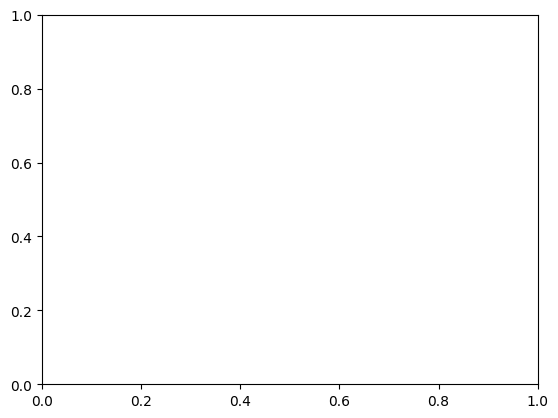

In [16]:
stats_ = ["Conceded goals","Goals","Touches in penalty area","Shots against on target","Shots on target","Recoveries High","Passes","Penalty area entries runs or crosses","Passes accuracy","Forward passes percentage","Forward passes accuracy","Defensive duels accuracy","Offensive duels accuracy"]
lowValueStats = ["Conceded goals","Shots against on target"]
for stat in stats_:
    print(stat)
    plt.hist(currSeasonstats.get(stat),bins = 12,density=True)
    ucsdAvg = currSeasonstats.loc["UC San Diego Tritons"].get(stat)
    if stat in lowValueStats:
        ascend = True
    else:
        ascend = False
    sorted = currSeasonstats.sort_values(stat,ascending=ascend)
    sorted.head()
    highestTeam = sorted.index[0]
    highestVal = sorted.get(stat).iloc[0]
    plt.axvline(ucsdAvg, color="blue", linestyle="--",label = "UCSD")
    plt.axvline(highestVal, color="red", linestyle="--",label = "Best Value - "+highestTeam)
    plt.title("Distribution of "+stat)
    plt.xlabel("Average " +stat + " per Game")
    plt.legend()
    plt.plot()
    plt.savefig("Histograms/"+stat+"Histogram.png")
    plt.cla()

In [17]:
merged[(merged.get("Season")==2024)&(merged.get("Team") == "UC San Diego Tritons")]

,Date,Match,Competition,Duration,Team,Scheme,Goals,Difference in Goals and xG,Goal differential,xG,...,Throw ins,Throw ins accurate,Throw in percentage,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA,Season
731,2024-08-16,Berkeley Golden Bears - UC San Diego Tritons 2:1,United States. NCAA D1 Non-conference matches (W),98.0,UC San Diego Tritons,4-4-2 (100.0%),1.0,0.48,-1.0,0.52,...,38.0,29.0,0.763158,15.10,3.02,12.99,20.16,21.01,31.40,2024
765,2024-08-19,San Francisco Dons - UC San Diego Tritons 3:0,United States. NCAA D1 Non-conference matches (W),98.0,UC San Diego Tritons,4-1-4-1 (100.0%),0.0,-0.84,-3.0,0.84,...,35.0,22.0,0.628571,13.12,3.15,9.81,15.37,18.60,11.17,2024
789,2024-08-23,UC San Diego Tritons - Pepperdine Waves 0:1,United States. NCAA D1 Non-conference matches (W),93.0,UC San Diego Tritons,4-1-4-1 (100.0%),0.0,-0.66,-1.0,0.66,...,21.0,20.0,0.952381,16.27,3.20,8.89,23.16,18.97,11.33,2024
801,2024-08-25,UC San Diego Tritons - Nevada WolfPack 3:0,United States. NCAA D1 Non-conference matches (W),93.0,UC San Diego Tritons,4-1-4-1 (50.34%),3.0,0.99,3.0,2.01,...,27.0,21.0,0.777778,14.41,2.98,13.77,18.00,18.47,8.81,2024
841,2024-09-02,UC San Diego Tritons - California Baptist Lanc...,United States. NCAA D1 Non-conference matches (W),96.0,UC San Diego Tritons,4-1-4-1 (100.0%),0.0,-0.19,-1.0,0.19,...,43.0,33.0,0.767442,14.42,3.26,12.47,22.84,21.21,15.77,2024
851,2024-09-06,Idaho Vandals - UC San Diego Tritons 2:1,United States. NCAA D1 Non-conference matches (W),95.0,UC San Diego Tritons,4-2-3-1 (23.45%),1.0,0.25,-1.0,0.75,...,46.0,34.0,0.739130,14.62,3.52,8.52,20.94,18.98,8.73,2024
874,2024-09-08,Washington State Cougars - UC San Diego Triton...,United States. NCAA D1 Non-conference matches (W),95.0,UC San Diego Tritons,4-1-4-1 (100.0%),1.0,0.19,0.0,0.81,...,23.0,22.0,0.956522,13.46,2.78,13.74,19.42,20.02,8.39,2024
893,2024-09-13,San Diego State Aztecs - UC San Diego Tritons 0:1,United States. NCAA D1 Non-conference matches (W),97.0,UC San Diego Tritons,4-5-1 (100.0%),1.0,-0.23,1.0,1.23,...,40.0,28.0,0.700000,14.84,3.06,11.22,16.73,19.73,6.51,2024
927,2024-09-20,UC San Diego Tritons - UC Irvine Anteaters 0:0,United States. NCAA D1 Big West (W),95.0,UC San Diego Tritons,4-1-4-1 (100.0%),0.0,-0.38,0.0,0.38,...,29.0,25.0,0.862069,11.45,2.99,15.37,25.63,20.19,5.20,2024
935,2024-09-22,UC San Diego Tritons - Pacific Tigers 0:1,United States. NCAA D1 Non-conference matches (W),96.0,UC San Diego Tritons,4-4-2 (47.0%),0.0,-1.25,-1.0,1.25,...,36.0,29.0,0.805556,14.86,3.43,11.88,19.58,19.34,5.61,2024


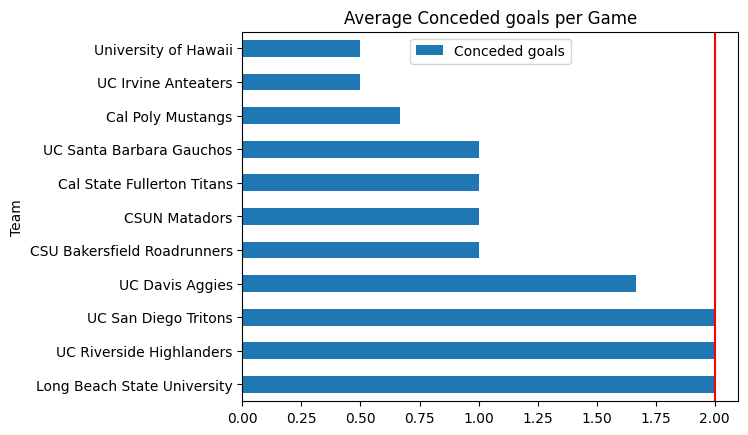

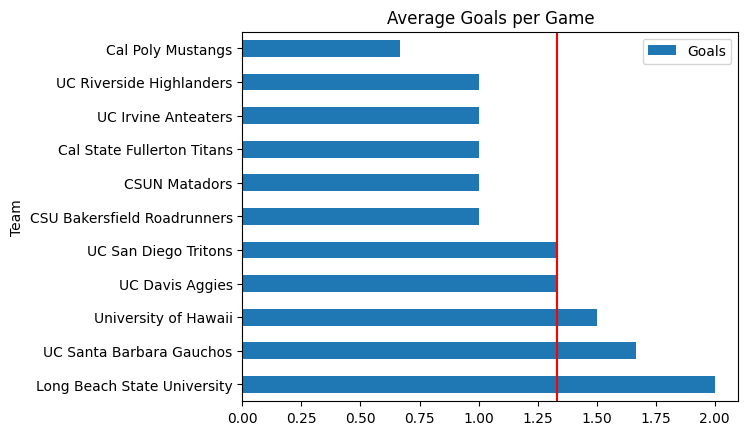

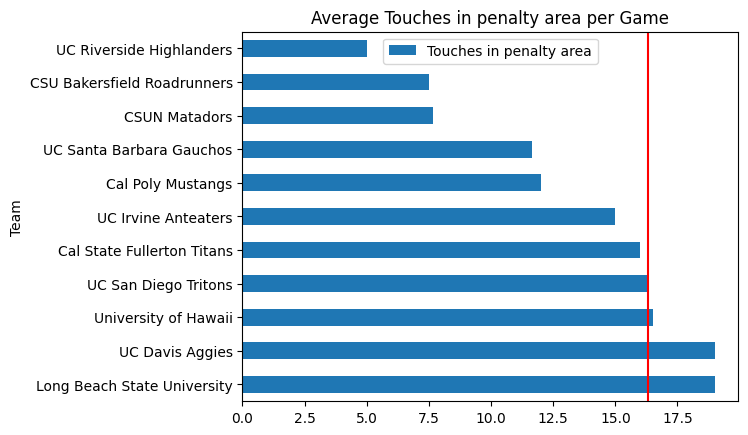

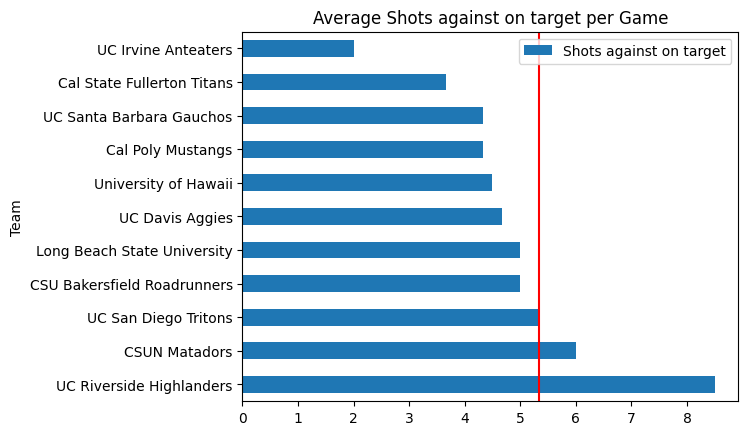

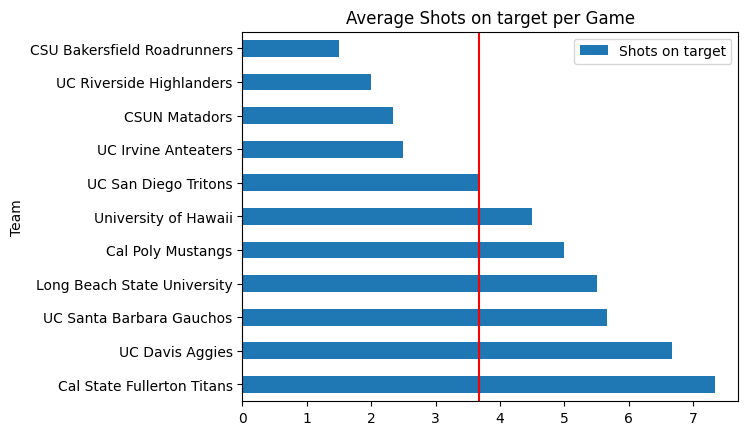

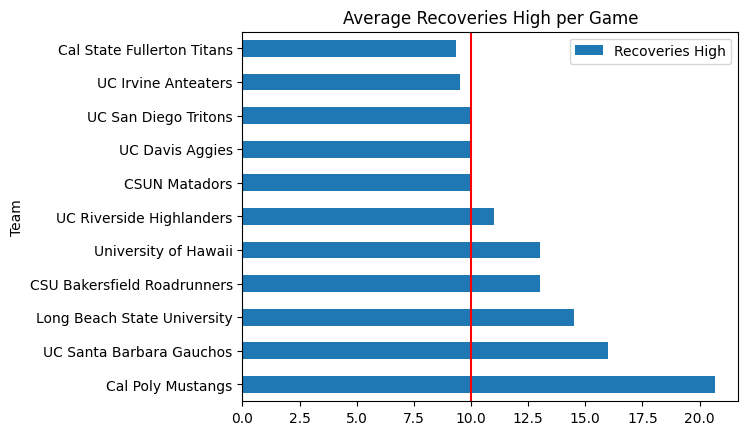

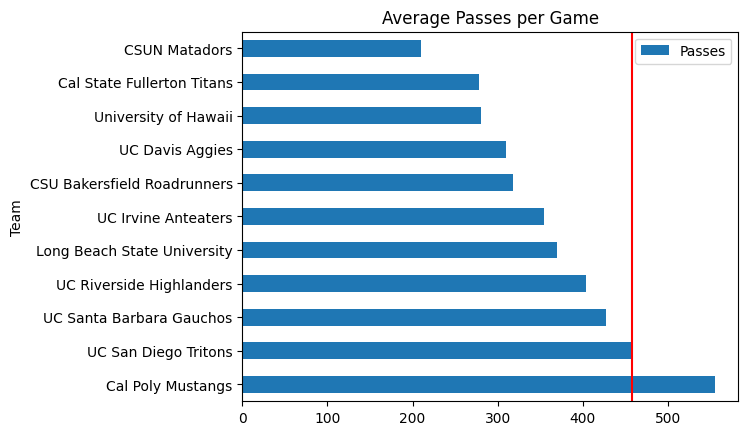

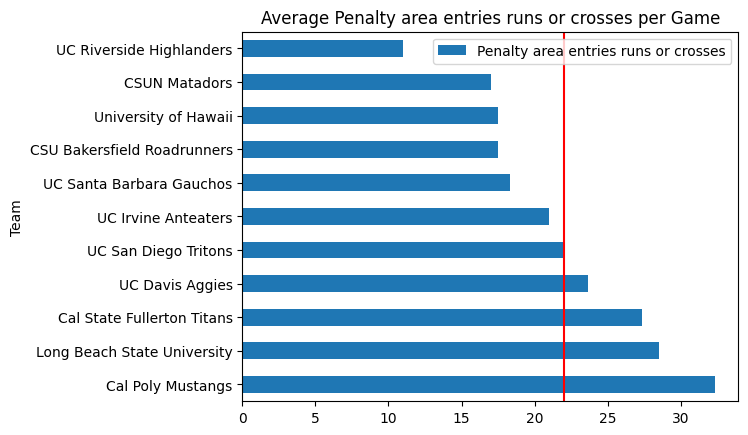

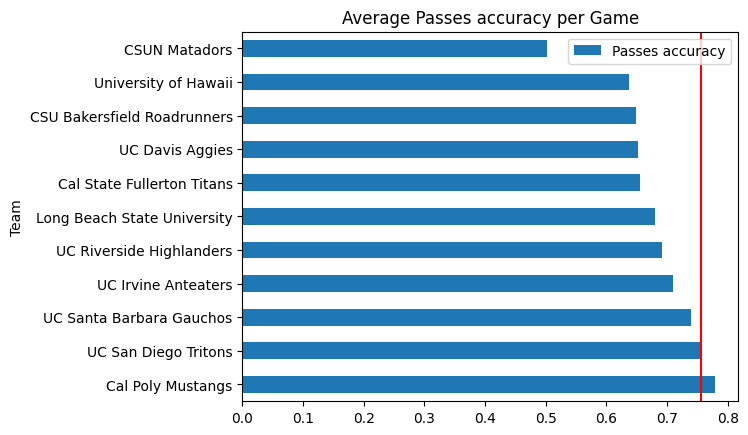

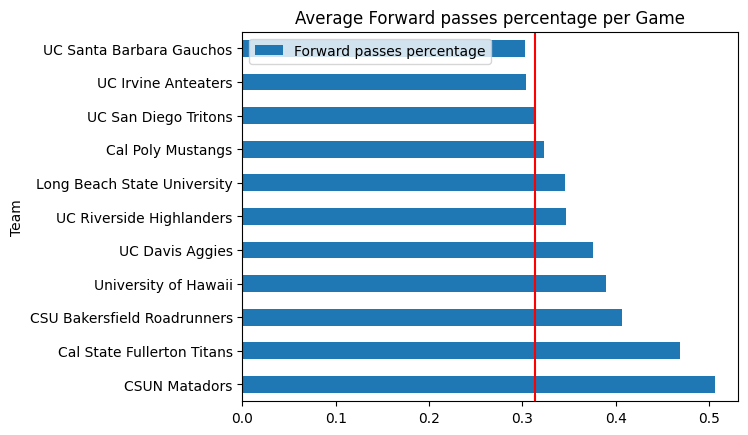

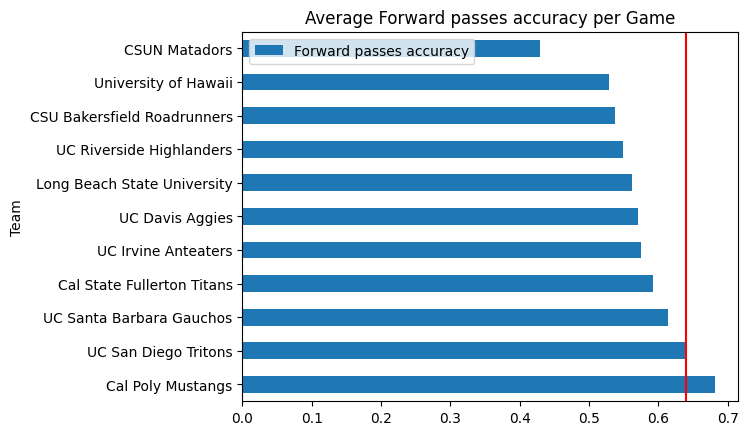

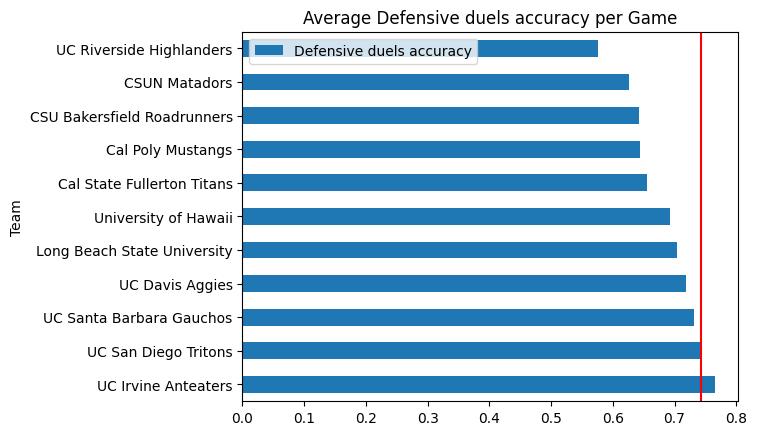

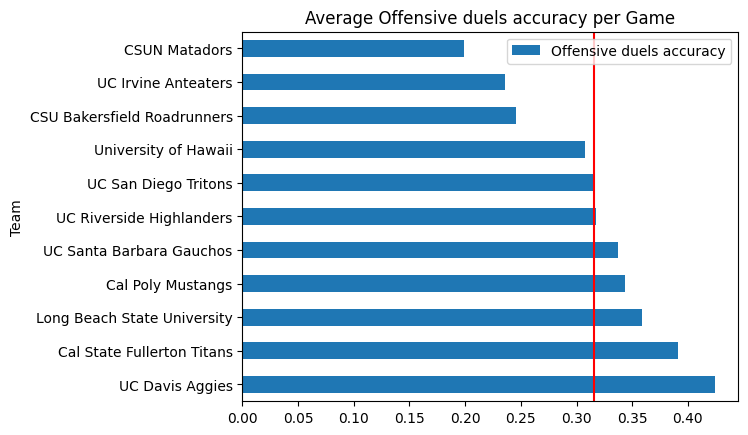

In [18]:
stats_ = ["Conceded goals","Goals","Touches in penalty area","Shots against on target","Shots on target","Recoveries High","Passes","Penalty area entries runs or crosses","Passes accuracy","Forward passes percentage","Forward passes accuracy","Defensive duels accuracy","Offensive duels accuracy"]
for stat in stats_:
    sorted = currSeasonstats.get([stat]).sort_values(stat,ascending=False)
    ucsd  = sorted.loc["UC San Diego Tritons"].values[0]
    sorted.plot(kind = "barh")
    plt.axvline(ucsd, label = "UCSD",color = "r")
    plt.title("Average {} per Game".format(stat))

In [27]:
currSeasonstats.assign(shotsOutPerc = 1-currSeasonstats.get("Shots against from outside penalty area")/currSeasonstats.get("Shots")).get("shotsOutPerc").sort_values(ascending = False).plot(kind = 'barh')

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [29]:
currSeasonstats.columns.tolist()

['Season',
 'Duration',
 'Goals',
 'xG',
 'Shots',
 'Shots on target',
 'Passes',
 'Passes accurate',
 'Possession, %',
 'Losses',
 'Losses Low',
 'Losses Medium',
 'Losses High',
 'Recoveries',
 'Recoveries Low',
 'Recoveries Medium',
 'Recoveries High',
 'Duels',
 'Duels won',
 'Shots from outside penalty area',
 'Shots from outside penalty area on target',
 'Positional attacks',
 'Positional attacks with shots',
 'Counterattacks',
 'Counterattacks with shots',
 'Set pieces',
 'Set pieces with shots',
 'Corners',
 'Corners with shots',
 'Free kicks',
 'Free kicks with shots',
 'Penalties',
 'Penalties converted',
 'Crosses',
 'Crosses accurate',
 'Deep completed crosses',
 'Deep completed passes',
 'Penalty area entries (runs',
 'Penalty area entries (runs crosses)',
 'Touches in penalty area',
 'Penalty area entries runs or crosses',
 'Offensive duels',
 'Offensive duels won',
 'Offsides',
 'Conceded goals',
 'Shots against',
 'Shots against on target',
 'Defensive duels',
 'Defensi

In [19]:
# features = seasonStats.drop(["Team","Season","Duration","Goals","Conceded goals","xG","Difference in Goals and xG","Passes accurate","Duels won","Positional attacks with shots",'Counterattacks','Counterattacks with shots','Set pieces','Set pieces with shots','Corners','Corners with shots','Free kicks','Free kicks with shots','Penalties','Penalties converted',"Offsides","Offensive duels won","Defensive duels won","Aerial duels won",'Sliding tackles','Sliding tackles successful','Forward passes accurate','Back passes','Lateral passes','Long passes','Passes to final third','Progressive passes','Throw ins',],axis = 1)
# features = ["Points","Shots against on target","Shots",'Possession, %',"Shots on target","Forward passes accuracy", "Passes","Match tempo", "Crosses","Deep completed passes", "Deep completed crosses","Offensive duels accuracy","Defensive duels accuracy", "Throw in percentage", "PPDA","Recoveries High","Recoveries Medium","Recoveries Low","Losses High","Losses Medium","Losses Low","Yellow cards"]
# X = seasonStats.get(features)
# featuresStandardized = (X-X.mean())/X.std()
# Y = X.get("Points").to_numpy()
# ones = np.ones(featuresStandardized.shape[0])
# designMatrix = np.column_stack((ones,featuresStandardized.drop("Points",axis=1).to_numpy()))
# w_star_linalg = np.linalg.inv(designMatrix.T @ designMatrix) @ designMatrix.T @ Y
# slopeFeatures = ["Intercept"]+features[1:]
# slopes = pd.DataFrame(w_star_linalg,index=slopeFeatures,columns=["Slope"]).sort_values("Slope")
# slopes

In [20]:
#League paramters for success
stat = "Points"
statCorr = seasonStats.drop(["Team"],axis = 1).corr(method="pearson").get([stat])
significant = statCorr[(abs(statCorr).get(stat)>.6) & (statCorr.get(stat)<1)].sort_values("Points")
significantFeatures = significant.index.tolist()
significant

TypeError: bad operand type for abs(): 'NoneType'

In [20]:
#League paramters for success
stat = "Goals"
statCorr = seasonStats.drop(["Team"],axis = 1).corr(method="pearson").get([stat])
significant = statCorr[(abs(statCorr).get(stat)>.6) & (statCorr.get(stat)<1)].sort_values("Goals")
significantFeatures = significant.index.tolist()
significant

,Goals
Conceded goals,-0.658703
Penalty area entries (runs crosses),0.606695
Positional attacks with shots,0.639841
Penalty conversion percentage,0.644140
Shots,0.662306
Touches in penalty area,0.693955
Points,0.713053
Shots on target,0.724721
xG,0.755101


In [21]:
#League paramters for success
stat = "Conceded goals"
statCorr = seasonStats.drop(["Team"],axis = 1).corr(method="pearson").get([stat])
significant = statCorr[(abs(statCorr).get(stat)>.6) & (statCorr.get(stat)<1)].sort_values("Conceded goals")
significantFeatures = significant.index.tolist()
significant

,Conceded goals
Points,-0.883585
Penalty area entries (runs,-0.757734
Touches in penalty area,-0.747625
Recoveries High,-0.703222
Positional attacks,-0.671459
Losses High,-0.666575
Goals,-0.658703
Crosses,-0.642560
Deep completed passes,-0.627615
Deep completed crosses,-0.618635


In [22]:
for feature in significantFeatures:
    x = feature
    y = 'Points'
    slope, intercept, r, p,std_err = stats.linregress(seasonStats.get(x),seasonStats.get(y))
    def predictPoint(x):
        return slope*x+intercept
    predicted = seasonStats.get(x).apply(predictPoint)
    seasonStats.plot(kind = "scatter",x = x,y=y)
    plt.plot(seasonStats.get(x),predicted)
    plt.title(x+" VS. "+y + " team averages per game")
    print(feature)
    print("Slope:",slope)
    print("Corr:",r)


AttributeError: 'list' object has no attribute 'linregress'

In [325]:
def addGamePoints(gd):
    if gd>0:
        return 3
    elif gd<0:
        return 0
    else:
        return 1
merged.insert(6,"Points",merged.get("Goal differential").apply(addGamePoints))

In [326]:
#League paramters for success
stat = "Points"
statCorr = merged.drop(["Team","Date","Match","Competition","Scheme"],axis = 1).corr(method="pearson").get([stat])
significant = statCorr[(abs(statCorr).get(stat)>.4) & (statCorr.get(stat)<1)].sort_values(stat)
significantFeatures = significant.index.tolist()
significant

,Points
Conceded goals,-0.619053
Shots against on target,-0.463929
Shots,0.409549
Touches in penalty area,0.445635
Shots on target,0.489088
xG,0.490381
Goals,0.657795
Goal differential,0.843028


In [327]:
# for feature in significantFeatures:
#     x = feature
#     y = stat
#     slope, intercept, r, p,std_err = stats.linregress(merged.get(x),merged.get(y))
#     def predictPoint(x):
#         return slope*x+intercept
#     predicted = merged.get(x).apply(predictPoint)
#     merged.plot(kind = "scatter",x = x,y=y)
#     plt.plot(merged.get(x),predicted)
#     plt.title(x+" VS. "+y )
#     print("Slope:",slope)
#     print("Corr:",r)

In [23]:
ucsd = merged[(merged.get("Team") == "UC San Diego Tritons")&(merged.get("Competition")=="United States. NCAA D1 Big West (W)")]
#League paramters for success
stat = "Points"
statCorr = ucsd.drop(["Team","Date","Match","Competition","Scheme"],axis = 1).corr(method="pearson").get([stat])
significant = statCorr[(abs(statCorr).get(stat)>.4) & (statCorr.get(stat)<1)].sort_values(stat)
significantFeatures = significant.index.tolist()
significant

TypeError: bad operand type for abs(): 'NoneType'

In [329]:
# for feature in significantFeatures:
#     x = feature
#     y = stat
#     slope, intercept, r, p,std_err = stats.linregress(ucsd.get(x),ucsd.get(y))
#     def predictPoint(x):
#         return slope*x+intercept
#     predicted = ucsd.get(x).apply(predictPoint)
#     ucsd.plot(kind = "scatter",x = x,y=y)
#     plt.plot(ucsd.get(x),predicted)
#     plt.title(x+" VS. "+y )
#     print("Slope:",slope)
#     print("Corr:",r)